In [1]:
path = 'C:\IITGN 2nd year\ES 204 Digital Systems\Local Contrast Enhancement of Image\\105.jpg'
import matplotlib.image as Image
import numpy as np
import matplotlib.pyplot as plt

(150, 150)


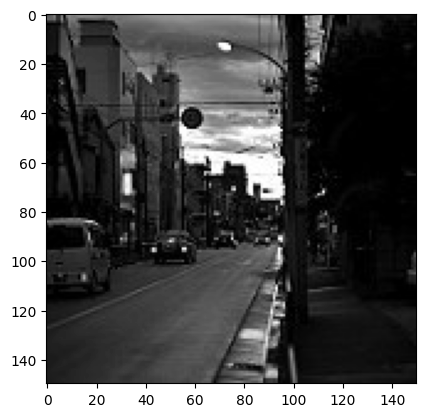

In [2]:
img= Image.imread(path)
print (img.shape)
plt.imshow(img, cmap='gray')

In [24]:
window_size= (30,30)
print(img)

[[ 71  78  85 ...  19  14   8]
 [ 95  93  99 ...  20  14   9]
 [102  97  97 ...  12   8   8]
 ...
 [ 28  29  30 ...  21  20  20]
 [ 27  28  29 ...  16  15  15]
 [ 27  28  29 ...  13  12  12]]


[[152 158 167 ...  58  46  28]
 [179 176 183 ...  62  46  31]
 [185 181 181 ...  40  28  28]
 ...
 [ 28  31  34 ...  53  50  50]
 [ 24  28  31 ...  36  33  33]
 [ 24  28  31 ...  26  23  23]]


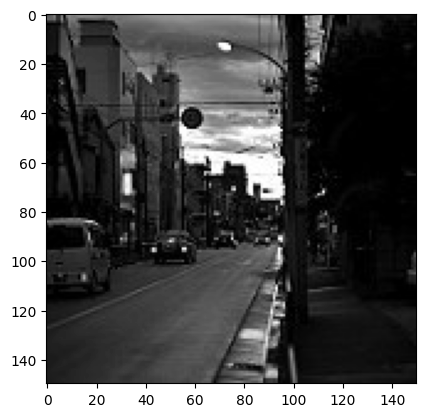

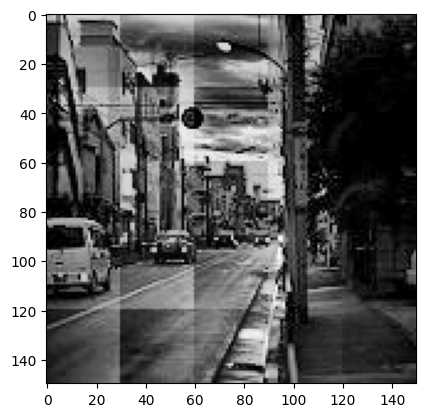

In [35]:
equalised_img = np.copy(img)
clip_lim = 10

for i in range(0,img.shape[0], window_size[0]):
    for j in range(0,img.shape[1], window_size[1]):
        window = img[i:i+window_size[0], j:j+window_size[1]]
        w_1d = window.flatten()
        
        intensity=np.zeros(256)
        for pix in w_1d:
            intensity[pix]+=1

        excess_pix = np.maximum(intensity-clip_lim, 0) # no. of pixels above clip limit
        clipped_hist = intensity - excess_pix  # subtracting the excess value
        excess_sum = np.sum(excess_pix)

        redistribute = excess_sum//256  # amount of excess sum redistributed to each pixel
        clipped_hist += redistribute

        pdf = clipped_hist

        cdf = np.zeros(256)
        cdf[0] = pdf[0]
        for k in range (1,256):
            cdf[k]=cdf[k-1]+pdf[k]
        
        cdf_normalised = (cdf - cdf[cdf>0].min())/(w_1d.size-cdf[cdf>0].min())
        histo_equal = np.round(cdf_normalised*255).astype(np.uint8)
        equalised_img[i:i+window_size[0], j:j+window_size[1]] = histo_equal[window]

print(equalised_img)
plt.imshow(img, cmap='gray')
plt.show()
plt.imshow(equalised_img, cmap='gray')
